# Quast results analysis

## Visualization of SPAdes assembly results

In [1]:
library(dplyr)
library(ggplot2)
library(tidyr)
library(svglite)

Warning message:
"package 'dplyr' was built under R version 3.4.4"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.4.4"Warning message:
"package 'tidyr' was built under R version 3.4.4"Warning message:
"package 'svglite' was built under R version 3.4.4"

### Functions

In [14]:
create_report <- function(df) {
  df <- df %>%
    rename(ctg_0_bp = X..contigs.....0.bp.,
           ctg_1000_bp = X..contigs.....1000.bp.,
           ctg_5000_bp = X..contigs.....5000.bp.,
           ctg_10000_bp = X..contigs.....10000.bp.,
           ctg_25000_bp = X..contigs.....25000.bp.,
           ctg_50000_bp = X..contigs.....50000.bp.,
           tot_len_0_bp = Total.length.....0.bp.,
           tot_len_1000_bp = Total.length.....1000.bp.,
           tot_len_5000_bp = Total.length.....5000.bp.,
           tot_len_10000_bp = Total.length.....10000.bp.,
           tot_len_25000_bp = Total.length.....25000.bp.,
           tot_len_50000_bp = Total.length.....50000.bp.,
           no_of_contigs = X..contigs,
           no_of_misassemblies = X..misassemblies,
           no_of_misassembled_ctg = X..misassembled.contigs,
           no_of_local_misassemblies = X..local.misassemblies,
           unaligned_contigs = X..unaligned.contigs,
           N_per_100kbp = X..N.s.per.100.kbp,
           mismatches_per_100kbp = X..mismatches.per.100.kbp,
           indels_per_100kbp = X..indels.per.100.kbp,
           no_of_genes = X..genes)
  return(df)
}

create_boxplot_report <- function(df) {
  df <- df %>%
    gather(key_contig,
           value_contig,
           ctg_0_bp,
           ctg_1000_bp,
           ctg_5000_bp,
           ctg_10000_bp,
           ctg_25000_bp,
           ctg_50000_bp) %>%
    gather(key_total,
           value_total,
           tot_len_0_bp,
           tot_len_1000_bp, 
           tot_len_5000_bp,
           tot_len_10000_bp,
           tot_len_25000_bp,
           tot_len_50000_bp) %>%
    gather(key_ng,
           value_ng,
           N50,
           NG50)
  return(df)
}

### Read data and wrangle

In [15]:
raw_report <- read.delim("D:/R_Data/Quast/transposed_report.tsv",
                         sep = "\t",
                         header = TRUE,
                         stringsAsFactors = F)

clean_report <- create_report(raw_report)
boxplot_report <- create_boxplot_report(clean_report)

### Plotting

#### Number of contigs

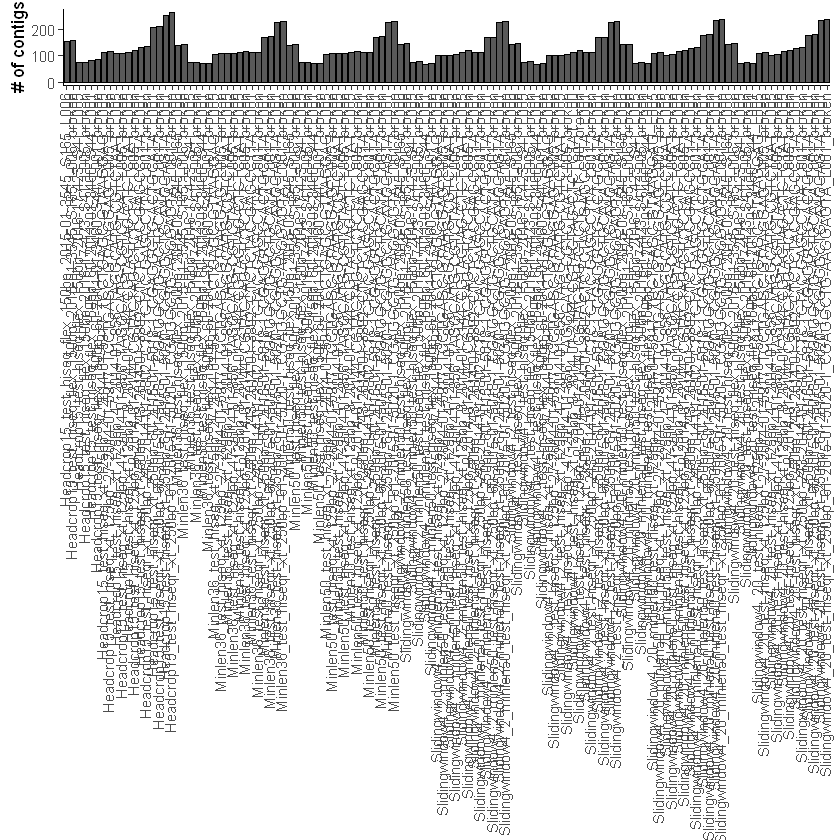

In [16]:
ggplot(clean_report, aes(Assembly, no_of_contigs))+
    geom_col(color = "black")+
    theme_classic()+
    labs(y = "# of contigs")+
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.3),
          axis.title.x = element_blank())

#### Number of misassemblies

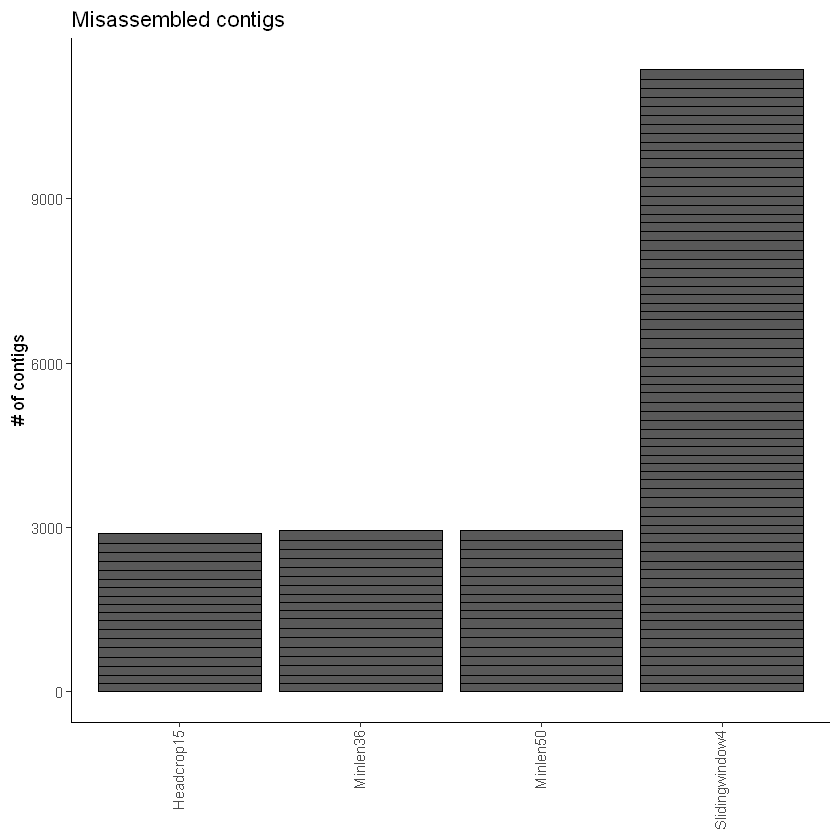

In [6]:
ggplot(clean_report, aes(Assembly, no_of_misassemblies))+
    geom_col(color = "black")+
    theme_classic()+
    labs(title = "Misassembled contigs",
         y = "# of contigs")+
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.3),
          axis.title.x = element_blank())

#### Ns per 100 kbp

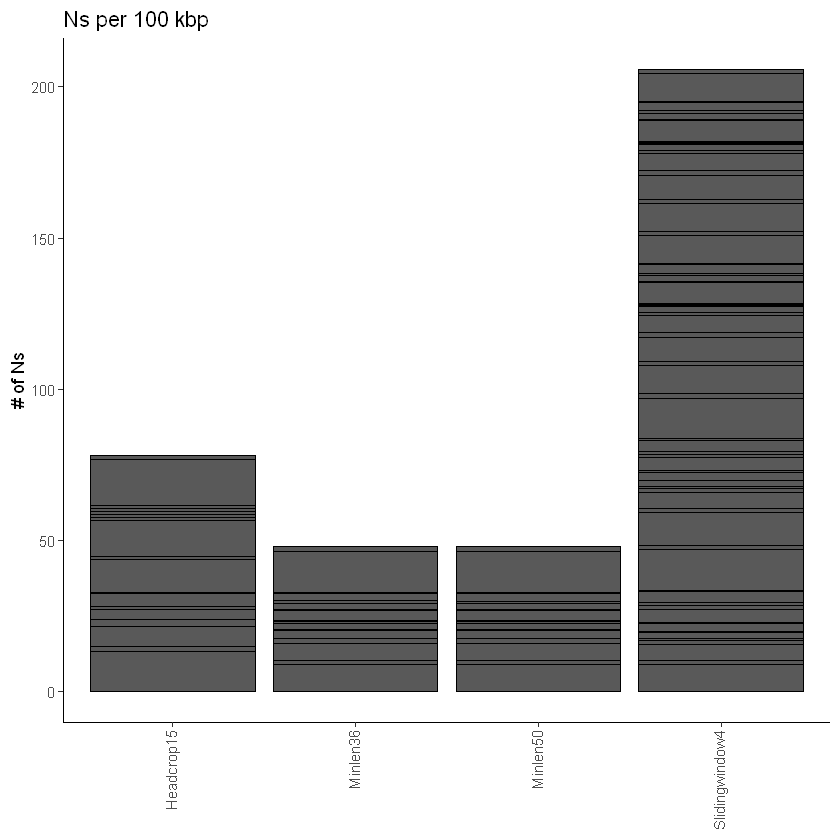

In [7]:
ggplot(clean_report, aes(Assembly, N_per_100kbp))+
    geom_col(color = "black")+
    theme_classic()+
    labs(title = "Ns per 100 kbp",
         y = "# of Ns")+
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.3),
          axis.title.x = element_blank())

#### Assembly contigs

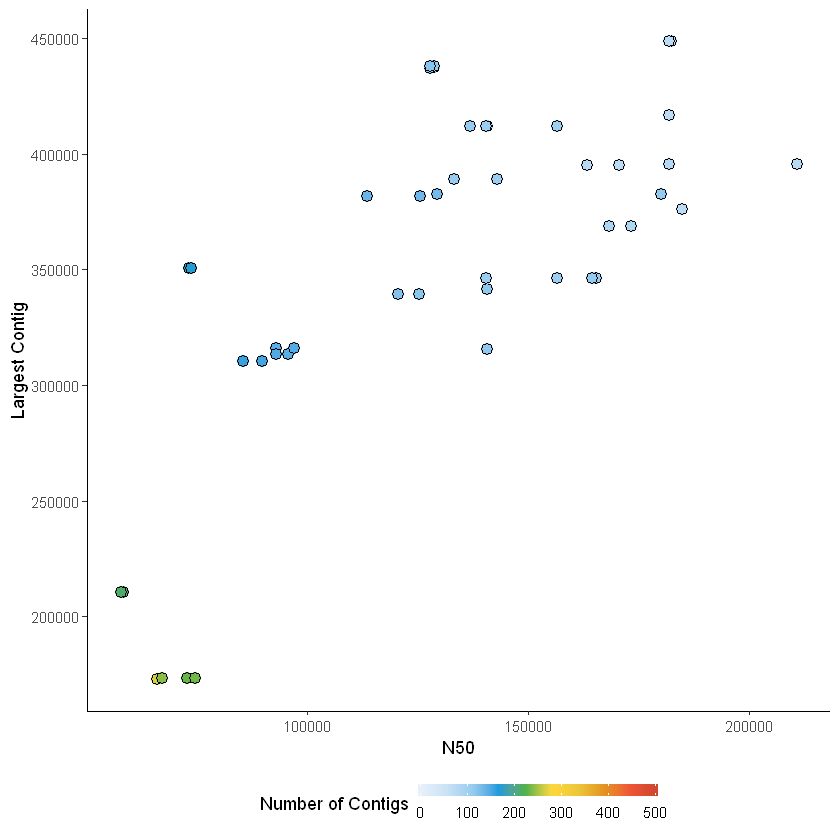

In [8]:
cols <- c("#e7f0fa","#c9e2f6",
            "#95cbee","#0099dc",
            "#4ab04a", "#ffd73e",
            "#eec73a","#e29421",
            "#f05336","#ce472e")

ggplot(clean_report, aes(N50, Largest.contig, fill = no_of_contigs))+
    geom_point(pch = 21,
               size = 3)+
    scale_fill_gradientn(colors=cols,na.value="black",
                         limits=c(0,500),
                         guide=guide_colourbar(ticks=T,nbin=50,
                                               barheight=.5,label=T, 
                                               barwidth=10))+
    theme_classic()+
    labs(y = "Largest Contig",
         fill = "Number of Contigs")+
    theme(legend.position = "bottom")

#### Number of contigs per size

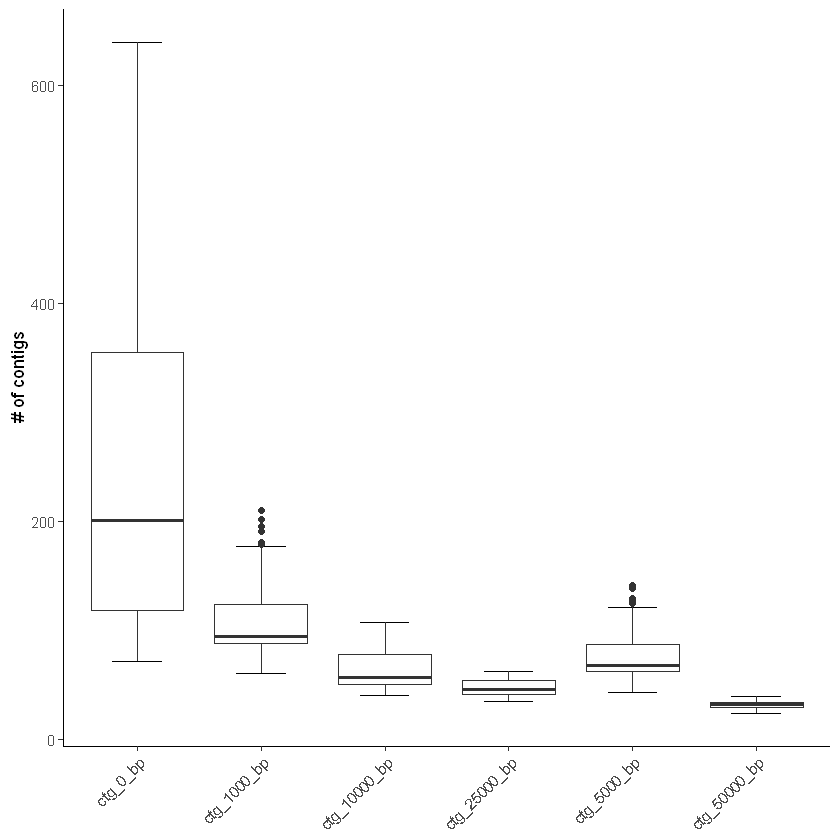

In [11]:
ggplot(boxplot_report, aes(key_contig, value_contig))+
    stat_boxplot(geom = "errorbar", width = 0.4)+
    geom_boxplot()+
    theme_classic()+
    labs(y = "# of contigs")+
    theme(axis.title.x = element_blank(),
          axis.text.x = element_text(angle = 45, hjust = 1))

#### Assembly contig sizes

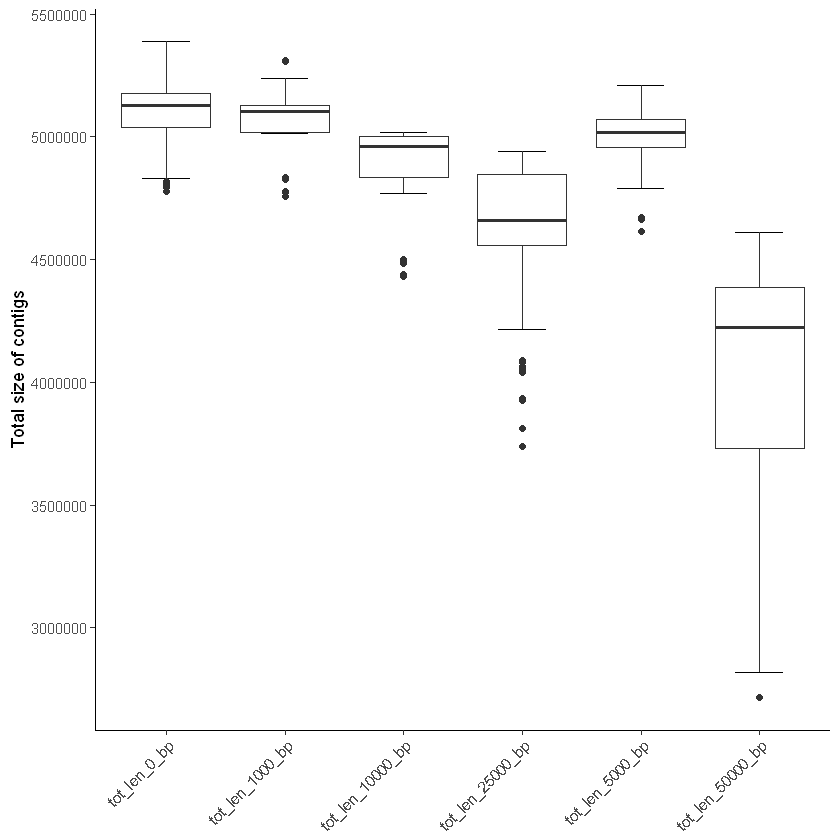

In [9]:
ggplot(boxplot_report, aes(key_total, value_total))+
    stat_boxplot(geom="errorbar", width = 0.4)+
    geom_boxplot()+
    theme_classic()+
    labs(y = "Total size of contigs")+
    theme(axis.title.x = element_blank(),
          axis.text.x = element_text(angle = 45, hjust = 1))

#### N50 / NG50

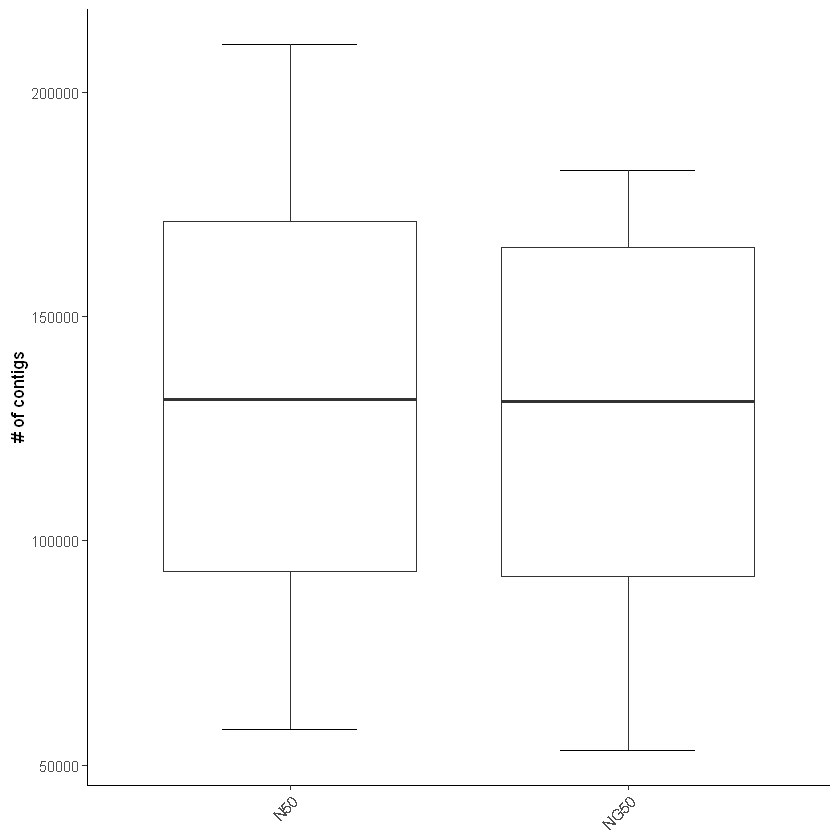

In [10]:
ggplot(boxplot_report, aes(key_ng, value_ng))+
    stat_boxplot(geom = "errorbar", width = 0.4)+
    geom_boxplot()+
    theme_classic()+
    labs(y = "# of contigs")+
    theme(axis.title.x = element_blank(),
          axis.text.x = element_text(angle = 45, hjust = 1))